In [24]:
import pandas as pd
import numpy as np

## Israel-Palestine

In [28]:
csv = pd.read_csv('../csv/UcdpPrioConflict_v25_1.csv')
csv.sort_values(by=['year'], inplace=True)
csv.reset_index(drop=True, inplace=True)

In [29]:
def israelpalestine(df):
    # df_cleaned = df[df['side_a'] == 'Government of Israel']
    df_cleaned = df[df['conflict_id'] == 234]
    df_cleaned = df_cleaned.reset_index(drop=True)
    return df_cleaned

csv_cleaned = israelpalestine(csv)
csv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   conflict_id           68 non-null     int64  
 1   location              68 non-null     object 
 2   side_a                68 non-null     object 
 3   side_a_id             68 non-null     object 
 4   side_a_2nd            0 non-null      object 
 5   side_b                68 non-null     object 
 6   side_b_id             68 non-null     object 
 7   side_b_2nd            3 non-null      object 
 8   incompatibility       68 non-null     int64  
 9   territory_name        68 non-null     object 
 10  year                  68 non-null     int64  
 11  intensity_level       68 non-null     int64  
 12  cumulative_intensity  68 non-null     int64  
 13  type_of_conflict      68 non-null     int64  
 14  start_date            68 non-null     object 
 15  start_prec            68 

In [30]:
csv_cleaned.sort_values(by=['year'], inplace=True)
csv_cleaned.reset_index(drop=True, inplace=True)
csv_cleaned.to_csv('../csv/cleaned/israelpalestine.csv', index=False)

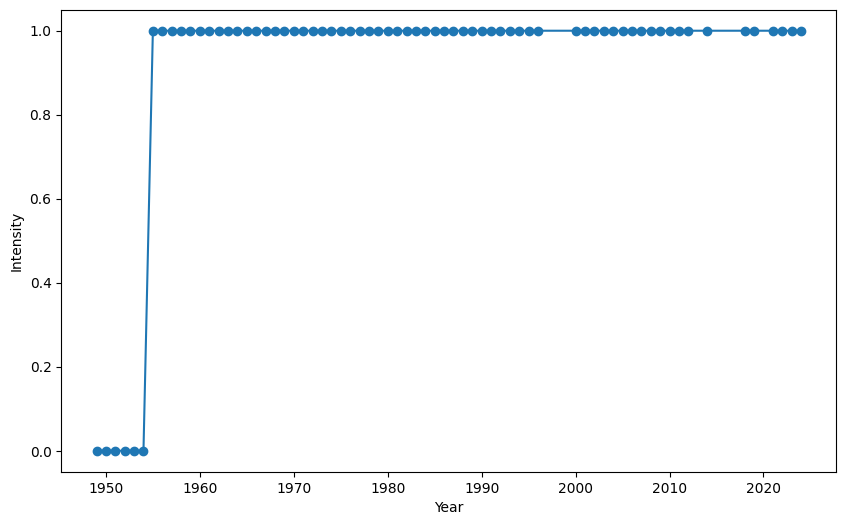

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(csv_cleaned['year'], csv_cleaned['cumulative_intensity'], marker='o')
plt.xlabel('Year')
plt.ylabel('Intensity')
plt.show()